# **Decision Tree Classification Algorithm**

## WALISA ROMSAIYUD - STOU

**1) Import Libraries**

In [ ]:
#การนำเข้า Library ที่สำคัญ
import pandas as pd  #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #statistical data visualization
import sklearn as sk #machine learning model
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**2) Read Dataset**

In [ ]:
#การนำเข้าไฟล์
studentdata = pd.read_excel('/content/sample_data/study42Y_Train.xlsx')
studentdata.head(5)

,BSc,Gender,CGPA,Experience,Province,EnglishProficiencyCertificate,Thesis/IS,Result
0,1,0,3.2,3,Bangkok,1,1,0
1,1,0,3.0,3,Tak,1,1,0
2,1,0,2.7,3,Bangkok,0,0,1
3,1,0,2.9,1,Bangkok,1,1,0
4,1,0,2.7,2,Bangkok,1,1,0


**3) Exploratory Data Analysis: EDA**

In [ ]:
#การเตรียมข้อมูล ที่ข้อมูลจะต้องเป็นตัวเลข 
all_features = [name for name in studentdata.columns if studentdata[name].dtype == 'object']
all_features

['Province']

**3.1) Convert an Object to Int**

In [ ]:
#การแปลงข้อมูลจังหวัด (Province) ให้เป็นตัวเลข
all_features=[name for name in studentdata.columns if studentdata[name].dtype =='object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(all_features):
  studentdata[i]=le.fit_transform(studentdata[i])
for x in all_features:
  print(x," = ",studentdata[x].unique())

Province  =  [ 0 12  3  9 11  2  5 14  1  7  4 13  8 15  6 10]


In [ ]:
#การแสดงข้อมูลจังหวัดที่ถูกแปลงเป็นตัวเลข
studentdata.head(10)

,BSc,Gender,CGPA,Experience,Province,EnglishProficiencyCertificate,Thesis/IS,Result
0,1,0,3.2,3,0,1,1,0
1,1,0,3.0,3,12,1,1,0
2,1,0,2.7,3,0,0,0,1
3,1,0,2.9,1,0,1,1,0
4,1,0,2.7,2,0,1,1,0
5,0,0,3.5,2,0,0,0,1
6,0,0,2.9,2,3,0,1,1
7,0,0,2.8,3,0,0,1,1
8,1,0,2.8,3,0,0,1,1
9,1,0,2.5,3,9,0,0,1


**3.2) Feature Selection with Chi-Square**

In [ ]:
#การเลือกคุณลักษณะ(Feature Selection) ที่สัมพันธ์กับผลลัพธ์ (Result)
from sklearn.feature_selection import chi2
studentdata.fillna(0, inplace=True)
X = studentdata.drop('Result',axis=1)
y = studentdata['Result']
chi_scores = chi2(X,y)
chi_scores

(array([1.18463213e+01, 8.67814181e+00, 2.64262231e+00, 4.16646040e-02,
        5.43372351e+00, 2.87576895e+01, 2.59544810e-02]),
 array([5.77753652e-04, 3.22049178e-03, 1.04031701e-01, 8.38260435e-01,
        1.97515217e-02, 8.20235994e-08, 8.72011533e-01]))

In [ ]:
#การจัดเรียงลำดับความสำคัญของคุณลักษณะจากน้อยไปหามาก
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values

EnglishProficiencyCertificate    8.202360e-08
BSc                              5.777537e-04
Gender                           3.220492e-03
Province                         1.975152e-02
CGPA                             1.040317e-01
Experience                       8.382604e-01
Thesis/IS                        8.720115e-01
dtype: float64

Text(0.5, 1.0, 'Chi-square test for feature selection')

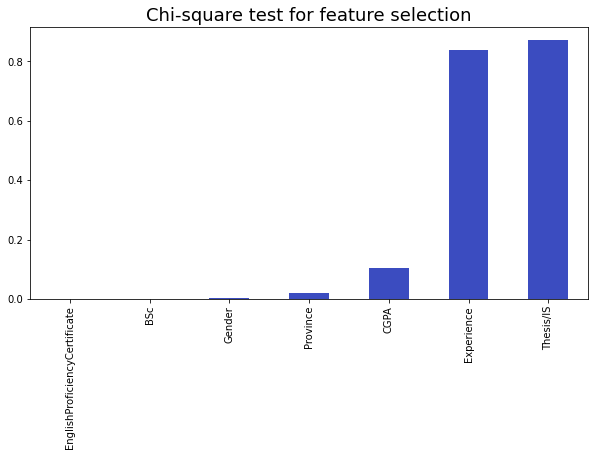

In [ ]:
#การสร้างกราฟแสดงคุณลักษณะจากน้อยไปหามาก
p_values.plot.bar(figsize = (10,5), cmap="coolwarm")
plt.title('Chi-square test for feature selection', size=18)

**3.3) Remove Some Attributes After Ffeature Selection**

In [ ]:
#การลบคุณลักษณะที่ไม่สำคัญออกไปจากชุดข้อมูล
newfeature = studentdata.columns.tolist()
newfeature.remove('BSc') 
newfeature.remove('Gender') 
newfeature.remove('EnglishProficiencyCertificate') 
newfeature

['CGPA', 'Experience', 'Province', 'Thesis/IS', 'Result']

**4) Split Training and Testing Data Sets (80:20)**

In [ ]:
#การแบ่งชุดข้อมูลนักเรียนออกเป็น 80:20
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**5) Creating a Decision Tree Model**

In [ ]:
#การสร้างแบบจำลองต้นไม้ตัดสินใจ (Decision Tree)
modelDT = DecisionTreeClassifier(random_state=43)
#การฝึกสอนข้อมูล
modelDT.fit(X_train,y_train)
#การทำนายข้อมูล
predictions = modelDT.predict(X_test)

**6) Evaluation Model (Confusion Matrix)**

In [ ]:
#การสร้างคอนฟิวชันเมทริกซ์ เพื่อแสดงความถูกต้อง แม่นยำ และความครบถ้วนของแบบจำลอง
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions)) 
print(accuracy_score(y_test, predictions))

[[25  4]
 [ 7 14]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.78      0.67      0.72        21

    accuracy                           0.78        50
   macro avg       0.78      0.76      0.77        50
weighted avg       0.78      0.78      0.78        50

0.78


**6) Visualizing Decision Tree**

In [ ]:
#การสร้างภาพต้นไม่้ตัดสินใจ
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

cols = list(X_train.columns.values)
dot_data = tree.export_graphviz(modelDT, out_file=None,feature_names  = cols)  


graph = graphviz.Source(dot_data, format="png") 
graph

plt.savefig('tree_visualization.png')

graph.render("decision_tree_graphivz")


'decision_tree_graphivz.png'

<Figure size 432x288 with 0 Axes>

**7) Testing the Predictive Model with Unseen Data**

In [ ]:
#การสร้างการทดสอบข้อมูลใหม่
studentdata1 = pd.read_excel('/content/sample_data/study42Y_Test.xlsx')
studentdata1.head(5)

,BSc,Gender,CGPA,Experience,Province,EnglishProficiencyCertificate,Thesis/IS
0,1,0,2.3,2,0,0,0
1,1,1,3.5,1,12,0,0
2,0,1,2.4,3,0,0,1
3,0,0,2.2,1,3,1,1


**8) Saving Prediction Result to Excel (Display_ResultDT.xlsx)**

In [ ]:
#การทำนายชุดข้อมูลใหม่
test_predict = modelDT.predict(X=studentdata1)

# Create a submission for Kaggle
submission = pd.DataFrame({"Result":test_predict})

# Save submission to CSV
submission.to_excel("Display_ResultDT.xlsx", index=False)  


## **END**